<a href="https://colab.research.google.com/github/Semillero-de-Neuroinformatica-IA/DeepLearning--with-python/blob/main/mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

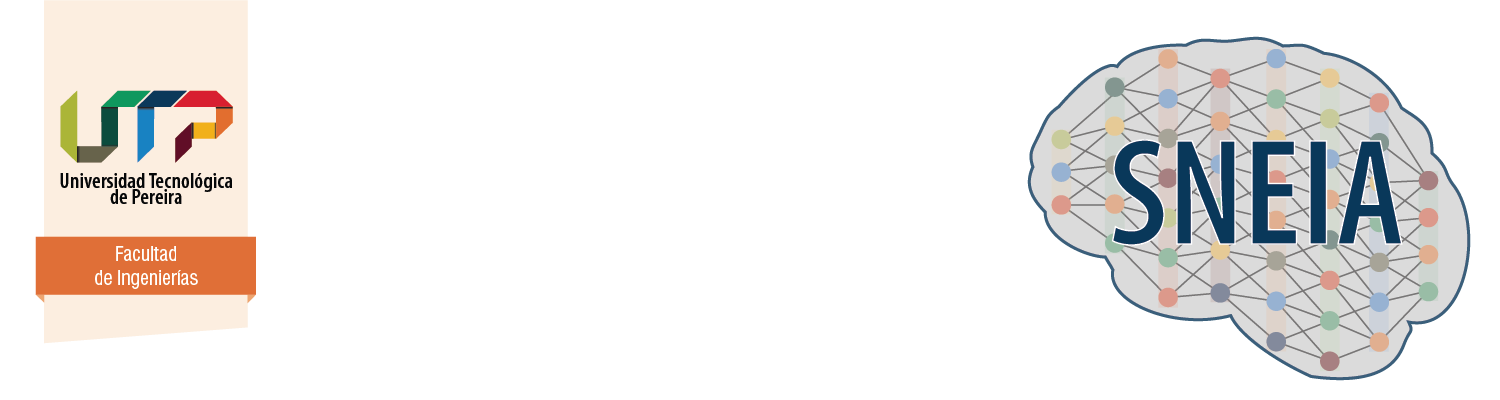
# Base de datos Fashion MNIST: Un ejemplo de visión por computador
# Creaión del modelo básico de clasificación
La [base de datos Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) es una base de datos de la plataforma especializada en moda Zalando. Esta base de datos contiene una serie de imágenes de muestras de moda de una gran variedad de prendas.Se compone de 60,000 imágenes de entrenamiento y 10,000 imágenes de test. Cada imagen está compuesta por una matriz de 28x28 pixeles de un color de un solo canal (gris). Cada una de las imágenes está asociada a una de estas etiquetas

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Esta base de datos está cargada en la API de keras y puede ser cargada directamente.


In [ ]:
# Carga de las librerías y de la base de datos
import tensorflow as tf
import numpy as np


fmnist=tf.keras.datasets.fashion_mnist

Utilizaremos el método `load_data()` de este objeto, el cuál devuelve dos tuples, con dos listas cada una. Estas serán las de entrenamiento y validación, las cuales a su vez contienen las imágenes y las etiquetas.

In [ ]:
(training_images, training_labels),(test_images, test_labels)=fmnist.load_data()

Ahora vamos a mirar una de las imágenes y su correspondiente etiqueta. Cada píxel de la imagen corresponde a un nivel de gris de 0 a 255.

In [ ]:
import matplotlib.pyplot as plt

# puede ser cualquier valor entre cero y 59999
index = 0
# se ajusta el número de caracteres a imprimir por línea
np.set_printoptions(linewidth=400)

# imprimimos la etiqueta y la imagen
print(f'Etiqueta: {training_labels[index]}')
print(f'\nArreglo de pixels\n {training_images[index]}')

#visualizamos la imagen
plt.imshow(training_images[index],cmap='gray')

Cuando se trabaja con redes neuronales, los valores grandes pueden afectar su funcionamiento. En particular debemos escalar los valores de la imágen que van desde 0 a 255, a un rango de 0 a 1. Esto se realizará de la siguiente manera:

In [ ]:
training_images=training_images / 255.0
test_images = test_images / 255.0

## Construcción del modelo
El modelo será secuencial, con una capa que transformará la imagen en un vector unidimensional, tendrá una capa oculta de 128 neuronas y una capa de salida de 10 neuronas con activación softmax

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

[Sequential](https://keras.io/api/models/sequential/): Define una secuencia de capas en una red neuronal.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Esta es la función que convierte la imagen a un vector unidimensional.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adiciona una capa de neuronas.

Cada capa necesita una [función de activación](https://keras.io/api/layers/activations/) para especificar su operación. En este caso se utilizan dos:

[ReLU](https://keras.io/api/layers/activations/#relu-function) la cuál significa:

```
if x > 0: 
  return x

else: 
  return 0
```

En otras palabras solo pasa valores mayores a cero a la siguiente capa en la red.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) toma una lista de valores y los escala de tal manera que la suma de los elementos sea igual a 1. Cuando se aplica a la salida de un smodelo, se puede pensar en los valores escalados como la probabilidad para cada clase. Por ejemplo si despues de aplicar esta función, el vector de salida de la red, posee un valor mas alto en la posición 5 se puede pensar que el objeto identificado fué una sandalia. En el siguiente ejemplo veremos estas funciones de activación funcionando.

In [ ]:
#cambiar  el comentario de línea para observar la otra función de activación
x=np.array([[1,-3,4, 2]], dtype='float')
x=tf.convert_to_tensor(x)
#outputs=tf.keras.activations.softmax(x)
outputs=tf.keras.activations.relu(x)
outputs


# Compilación y entrenamiento del modelo
A continuación definimos el optimizador, la medida de pérdida y la métrica para medir la efectividad del modelo.

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(training_images, training_labels, epochs=5)

# Evaluación de la respuesta del modelo
Ahora evaluamos el modelo con los datos de prueba

In [ ]:
model.evaluate(test_images, test_labels)


# Creación de un modelo utilizando k-fold
Hasta ahora hemos tenido un conjunto de entrenamiento y validación para el modelo. En machine learning es una buena práctica tener un tercer conjunto de datos (test) los cuales nunca serán vistos por nuestro modelo hasta el momendo de la evaluación, tal cuál se muestra en la parte a) de la figura mostrada a continuación.
Cuando se disponen de pocos datos de entrenamiento se usa el modelo  k-fold. Se crean varios subconjuntos de entrenamiento y validación a partir de los existentes para el entrenamiento, y se entrena el modelo sobre estos nuevos conjuntos de datos. Por último se evalúa el modelo con el conjunto de prueba (test), este proceso se muestra en la parte b) de la figura a continuación:


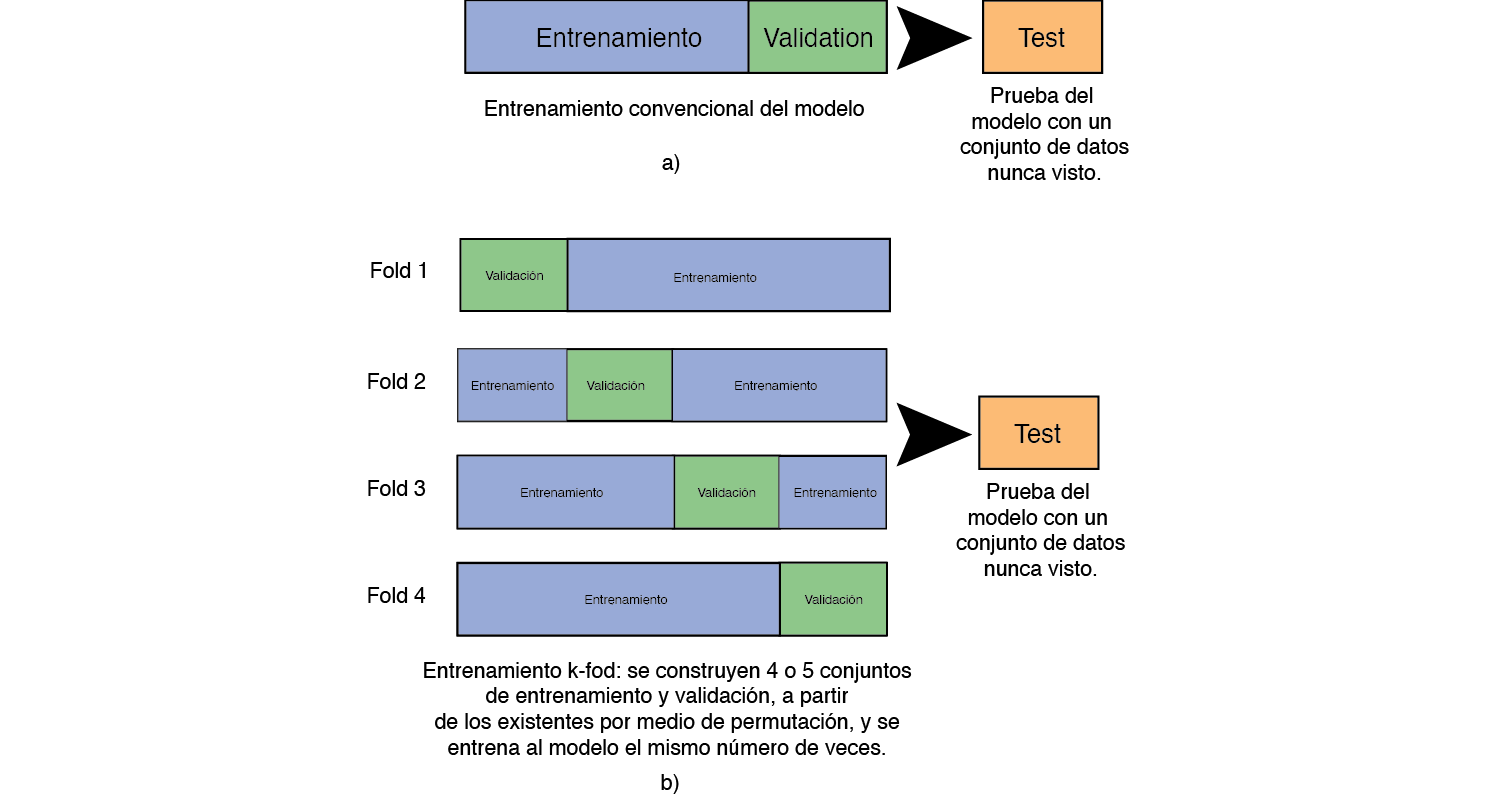

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# use boston housing data
#fmnist  = tf.keras.datasets.fashion_mnist
#(train_data, train_targets), (test_data, test_targets) = fmnist.load_data()

Construimos una función que construya el modelo

In [ ]:
# lets define a function to build our model in k fold problem
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=[ 'accuracy'])
    return model

Realizamos la validación cruzada

In [ ]:


# k fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = training_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = training_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [training_images[:i * num_val_samples],
         training_images[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [training_labels[:i * num_val_samples],
         training_labels[(i + 1) * num_val_samples:]],
        axis=0)
    modelb = build_model()
    modelb.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, verbose=1)
    

In [ ]:
print(f"clasificación sin kfold: {model.evaluate(test_data, test_targets)}")
print(f"clasificación con k-fold validation: {modelb.evaluate(test_data, test_targets)}")

# Utilidad de los Callbacks para detener el proceso de entrenamiento de nuestra red cuando se ha alcanzado algún valor deseado.
Se puede crear un callback definiendo una clase que herede las propiedades y métodos de la clase base [tf.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback). A partir de esta clase se puede definir los métodos disponibles para configurar el momento en el cual el Callback será ejecutado. En este caso particular utilizaremos el método [on_epoch_end()](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback#on_epoch_end) para chequear la precisión en cada instante y detener el proceso de entrenamiento cuando este iguale o supere el 65%

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.65):

      # Stop if threshold is met
      print("\nCancelando entrenamiento, la precisión es mayor a 65%!")
      self.model.stop_training = True



In [ ]:
(train_images,train_labels),(test_images, test_labels)=fmnist.load_data()

Definición y compilación del modelo

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=[ 'accuracy'])

Entrenamiento del modelo, dentro de la función de entrenamiento redirijimos los callbacks hacia el que hemos creado. 



In [ ]:
model.fit(train_images, train_labels, epochs=10, callbacks=myCallback())